In [0]:
from keras.datasets import cifar10

In [0]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
#from keras.layers import  Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

In [0]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMAGE_SIZE = 32

In [5]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #(X_train and X_test)-->contains the image and (y_train and y_test)-->contains the labels(0-9)
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 42s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [0]:
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
def pure_cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,IMG_CHANNELS)))    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same'))  
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', strides = 2))    
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same'))    
    model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same'))
    model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same', strides = 2))    
    model.add(Dropout(0.5))    
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding='valid'))

    model.add(GlobalAveragePooling2D())
    
    model.add(Activation('softmax'))

    model.summary()
    
    return model

In [15]:
model = pure_cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 192)       166080    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 192)       331968    
__________

In [16]:
# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
metrics=['accuracy'])
history=model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,
verbose=VERBOSE)
score = model.evaluate(X_test, Y_test,
batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 50s 1ms/step - loss: 2.2197 - acc: 0.1753 - val_loss: 2.0343 - val_acc: 0.2268
Epoch 2/20
40000/40000 [==============================] - 44s 1ms/step - loss: 1.8130 - acc: 0.3348 - val_loss: 1.7201 - val_acc: 0.3392
Epoch 3/20
40000/40000 [==============================] - 44s 1ms/step - loss: 1.5955 - acc: 0.4169 - val_loss: 1.5206 - val_acc: 0.4507
Epoch 4/20
40000/40000 [==============================] - 44s 1ms/step - loss: 1.4364 - acc: 0.4776 - val_loss: 1.4494 - val_acc: 0.4619
Epoch 5/20
40000/40000 [==============================] - 44s 1ms/step - loss: 1.3108 - acc: 0.5259 - val_loss: 1.2445 - val_acc: 0.5494
Epoch 6/20
40000/40000 [==============================] - 45s 1ms/step - loss: 1.2017 - acc: 0.5676 - val_loss: 1.1887 - val_acc: 0.5847
Epoch 7/20
40000/40000 [==============================] - 44s 1ms/step - loss: 1

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


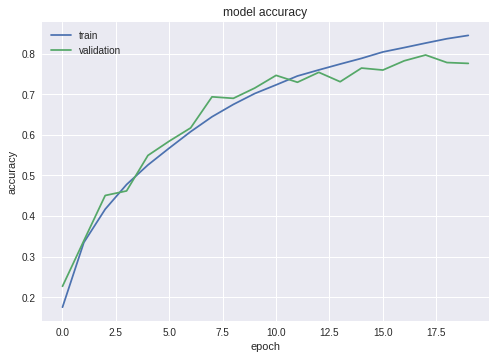

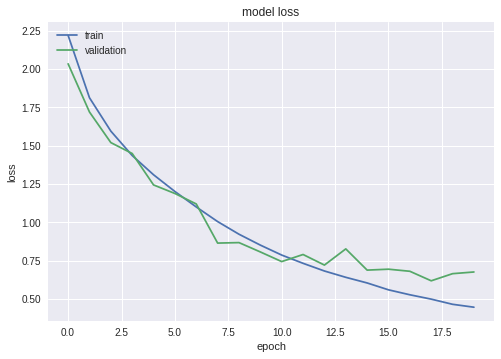

In [17]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
from google.colab import files
!rm -r *
!mkdir data
!ls

data


In [0]:
import scipy.misc

In [0]:
import numpy as np

In [22]:
files.upload()
!ls

Saving arplane.jpg to arplane.jpg
Saving atmb.jpg to atmb.jpg
Saving bird.jpg to bird.jpg
Saving cat.jpg to cat.jpg
Saving deer.jpg to deer.jpg
Saving dog.jpg to dog.jpg
Saving dog2.jpg to dog2.jpg
Saving frog.jpg to frog.jpg
Saving horse.jpg to horse.jpg
Saving ship.jpg to ship.jpg
Saving truck.jpg to truck.jpg
arplane.jpg  bird.jpg  data	 dog2.jpg  frog.jpg   ship.jpg
atmb.jpg     cat.jpg   deer.jpg  dog.jpg   horse.jpg  truck.jpg


In [23]:
imgs = scipy.misc.imread('dog.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([5])

In [24]:
imgs = scipy.misc.imread('frog.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([6])

In [25]:
imgs = scipy.misc.imread('deer.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([4])

In [26]:
imgs = scipy.misc.imread('arplane.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([0])

In [27]:
imgs = scipy.misc.imread('ship.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([8])

In [28]:
imgs = scipy.misc.imread('truck.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([9])

In [29]:
imgs = scipy.misc.imread('atmb.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([1])

In [30]:
imgs = scipy.misc.imread('bird.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([1])

In [31]:
imgs = scipy.misc.imread('cat.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([4])

In [32]:
imgs = scipy.misc.imread('horse.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([7])